In [1]:
# plot one or multiple inspirals on one time-scale plot

In [3]:
# import as needed
import mesa_reader as mr
import matplotlib.pylab as plt
import numpy as np
import os
from math import log
from scipy.integrate import cumtrapz
import math

# import function from another file
from ipynb.fs.full.functions import getMaxRadiusProfile

G = 6.67408e-11 # gravitational constant
# change G to cgs units
G = G * 1e3

Looking for the profile closest to model #189 in /Users/emilyflynn/Desktop/25M_tests/50M_logs/


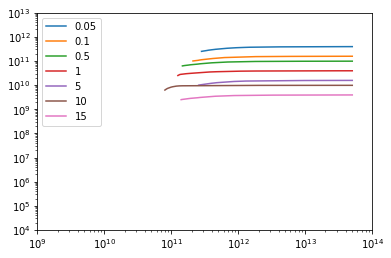

In [6]:
directory = '/Users/emilyflynn/Desktop/25M_tests/50M_logs/'
p = getMaxRadiusProfile(directory)

def getR2(m):
    if (m > 0.077):
        r = m**0.92
    elif (m < 0.0026):
        r = 0.10045 # r_jupiter
    else:
        r = 0.117
        r = r - 0.054*(log(m/0.0026)**2)
        r = r + 0.024*(log(m/0.0026)**3)
    return r

def plotTInspiral(p, m2, label):

    coreMass = p.he_core_mass + p.c_core_mass + p.o_core_mass + p.si_core_mass + p.fe_core_mass
    # change from Msuns to grams
    coreMass = coreMass*1.989e33

    radius = p.radius
    radius = radius*69.551e9

    # setting up constants
    r2 = getR2(m2)
    m2 = m2*1.989e33 # units
    r2 = r2*69.551e9 # units
    xi = 4
    rshred = r2 * (2*coreMass/m2)**(1/3)
    k = 4 * xi * math.pi * G * m2

    # density
    rho = p.logRho
    rho = 10**rho

    # masses
    masses = p.mass
    masses = masses*1.989e33

    # keplerian velocity
    vkep_r = np.sqrt(G * masses / radius)

    # dM/dr
    dMdr = np.diff(masses) / np.diff(radius)

    # make all the array sizes the same
    vkep_r = vkep_r[:-1]
    radius = radius[:-1]
    rho = rho[:-1]
    masses = masses[:-1]

    # integrand
    integrand = (dMdr - (masses / radius)) * vkep_r / (k * radius * rho)

    # look through everything in the radius array and compare it to rshred
    # when the value is <= rshred, save that index
    # chop the integrand and radius arrays at that index
    tInspiralOuter = cumtrapz(y=integrand, x=radius)
    
    i = 0
    for x in radius:
        if x > rshred:
            i+=1

    radiusOuter = radius[:i]
#     integrandOuter = integrand[:i]
    tInspiralOuter = tInspiralOuter[:i]

    # actually integrate
#     tInspiralOuter = cumtrapz(y=integrandOuter, x=radiusOuter)

    plt.loglog(np.flip(radiusOuter[100:]), tInspiralOuter[100:], label=label)
    
plt.ylim(1e4, 1e13)
plt.xlim(1e9, 1e14)

# for 1M
# plotTInspiral(p, 0.002, '0.002')
# plotTInspiral(p, 0.005, '0.005')
# plotTInspiral(p, 0.008, '0.008')
# plotTInspiral(p, 0.02, '0.02')
# plotTInspiral(p, 0.05, '0.05')
# plotTInspiral(p, 0.08, '0.08')
# plotTInspiral(p, 0.2, '0.2')

plotTInspiral(p, 0.002, '0.05')
plotTInspiral(p, 0.005, '0.1')
plotTInspiral(p, 0.008, '0.5')
plotTInspiral(p, 0.02, '1')
plotTInspiral(p, 0.05, '5')
plotTInspiral(p, 0.08, '10')
plotTInspiral(p, 0.2, '15')

plt.legend()